## 从简单任务开始

In [2]:
import openai
import os

openai.api_key = os.environ.get("OPENAI_API_KEY")
COMPLETION_MODEL = "text-davinci-003"


def get_response(prompt):
    completions = openai.Completion.create (
        engine=COMPLETION_MODEL,
        prompt=prompt,
        max_tokens=512,
        n=1,
        stop=None,
        temperature=0.0,        
    )
    message = completions['choices'][0].text # type: ignore
    return message

# 少了没有数据的21-22
print(get_response("皇家马德里获得过几次欧洲冠军联赛冠军，分别是哪几年？")) 



1955-56, 1956-57, 1957-58, 1958-59, 1959-60, 1965-66, 1997-98, 1999-2000, 2001-02, 2013-14, 2015-16, 2016-17, 2017-18.


In [3]:
# 基本上会胡扯
print(get_response("Imagen算法是什么？"))



Imagen算法是一种基于深度学习的图像分类算法，它可以自动识别图像中的物体，并将其分类为不同的类别。它使用卷积神经网络（CNN）来提取图像的特征，并使用支持向量机（SVM）来进行分类。


### 任务驱动，而不是问答驱动

In [1]:
import openai
import os

openai.api_key = os.environ.get("OPENAI_API_KEY")
COMPLETION_MODEL = "text-davinci-003"


prompt = """
Consideration proudct : 工厂现货PVC充气青蛙夜市地摊热卖充气玩具发光蛙儿童水上玩具

1. Compose human readale product title used on Amazon in english within 20 words.
2. Write 5 selling points for the products in Amazon.
3. Evaluate a price range for this product in U.S.

Output the result in json format with three properties called title, selling_points and price_range
"""

def get_response(prompt):
    completions = openai.Completion.create (
        engine=COMPLETION_MODEL,
        prompt=prompt,
        max_tokens=512,
        n=1,
        stop=None,
        temperature=0.0,        
    )
    message = completions['choices'][0].text # type: ignore
    return message

print(get_response(prompt)) 


{
    "title": "Glow-in-the-Dark Inflatable PVC Frog Night Market Hot Selling Water Toy",
    "selling_points": [
        "Made of durable PVC material",
        "Glow-in-the-dark design for night play",
        "Inflatable design for easy storage and transport",
        "Perfect for pool, beach, and lake play",
        "Great for children of all ages"
    ],
    "price_range": "$10 - $20"
}


### 试一下命名实体识别

In [4]:
sentence = "Man Utd must win trophies, says Ten Hag ahead of League Cup final"
prompt = f"请提取以下句子中的命名实体，并以json形式输出\n{sentence} \n"

print(get_response(prompt))


{
    "实体": ["Man Utd", "Ten Hag", "League Cup"]
}


In [6]:
prompt = f"请提取以下句子中的命名实体，并以json形式输出，json的key是实体的类型。\n{sentence} \n"
print(get_response(prompt))


{
    "Organization": ["Man Utd", "League Cup"],
    "Person": ["Ten Hag"]
}


In [7]:
order_sentence = "你好，我有一个订单一直没有收到，订单号是202303251200ABC"
prompt = f"请提取以下句子中的命名实体，并以json形式输出，json的key是实体的类型。\n{order_sentence} \n"
print(get_response(prompt))


{
    "订单号": "202303251200ABC"
}


### 情感分析

In [12]:
prompts = """判断一下以下用户的评论情感上是正面的还是负面的.

买的银色版真的很好看，一天就到了，晚上就开始拿起来完系统很丝滑流畅，做工扎实，手感细腻，很精致哦苹果一如既往的好品质。"""

print(get_response(prompts))



正面的。


### 更好的Prompt来控制结果输出

In [13]:
prompts = """判断一下用户的评论情感上是正面的还是负面的.

评论：买的银色版真的很好看，一天就到了，晚上就开始拿起来完系统很丝滑流畅，做工扎实，手感细腻，很精致哦苹果一如既往的好品质。
情感："""

print(get_response(prompts))

正面


## Few-shot Learning

In [14]:
prompts = """判断一下用户的评论情感上是正面的还是负面的
评论：买的银色版真的很好看，一天就到了，晚上就开始拿起来完系统很丝滑流畅，做工扎实，手感细腻，很精致哦苹果一如既往的好品质
情感：正面

评论：随意降价，不予价保，服务态度差
情感：负面
"""

good_case = prompts + """
评论：外形外观：苹果审美一直很好，金色非常漂亮
拍照效果：14pro升级的4800万像素真的是没的说，太好了，
运行速度：苹果的反应速度好，用上三五年也不会卡顿的，之前的7P用到现在也不卡
其他特色：14pro的磨砂金真的太好看了，不太高调，也不至于没有特点，非常耐看，很好的
情感：
"""

print(get_response(good_case))

正面


### 对于Few-Shot Learning的封装

In [19]:
class Example:
    def __init__(self, question, answer) -> None:
        self.question = question
        self.answer = answer

class PromptTemplate:
    def __init__(self, prompt, examples, question_prefix = "Q: ", answer_prefix = "A: ") -> None:
        self.prompt = prompt
        self.examples = examples
        self.question_prefix = question_prefix
        self.answer_prefix = answer_prefix

    def get_prompt(self, question):
        result = self.prompt + "\n\n"
        for example in self.examples:
            result += f"{self.question_prefix} {example.question}\n{self.answer_prefix} {example.answer}\n\n"
        result += f"{self.question_prefix} {question}\n{self.answer_prefix} "
        return result

example1 = Example("买的银色版真的很好看，一天就到了，晚上就开始拿起来完系统很丝滑流畅，做工扎实，手感细腻，很精致哦苹果一如既往的好品质", "正面")
example2 = Example("随意降价，不予价保，服务态度差", "负面")

prompt = PromptTemplate("判断一下用户的评论情感上是正面的还是负面的", [example1, example2], "评论：", "情感：")

question = """外形外观：苹果审美一直很好，金色非常漂亮
拍照效果：14pro升级的4800万像素真的是没的说，太好了，
运行速度：苹果的反应速度好，用上三五年也不会卡顿的，之前的7P用到现在也不卡
其他特色：14pro的磨砂金真的太好看了，不太高调，也不至于没有特点，非常耐看，很好的"""

print(f"Prompt:")
print(prompt.get_prompt(question))
print("\n\n")
print(f"Response:")
print(get_response(prompt.get_prompt(question)))




Prompt:
判断一下用户的评论情感上是正面的还是负面的

评论： 买的银色版真的很好看，一天就到了，晚上就开始拿起来完系统很丝滑流畅，做工扎实，手感细腻，很精致哦苹果一如既往的好品质
情感： 正面

评论： 随意降价，不予价保，服务态度差
情感： 负面

评论： 外形外观：苹果审美一直很好，金色非常漂亮
拍照效果：14pro升级的4800万像素真的是没的说，太好了，
运行速度：苹果的反应速度好，用上三五年也不会卡顿的，之前的7P用到现在也不卡
其他特色：14pro的磨砂金真的太好看了，不太高调，也不至于没有特点，非常耐看，很好的
情感： 



Response:
 正面


## Completions接口

### max_tokens, temperature, top_p, n 以及 stop 参数的演示

In [1]:
import openai
import os

openai.api_key = os.environ.get("OPENAI_API_KEY")
COMPLETION_MODEL = "text-davinci-003"

def get_response(prompt, max_tokens=512, temperature=0.0, n=1, stop=None):
    completions = openai.Completion.create(
        engine=COMPLETION_MODEL,
        prompt=prompt,
        max_tokens=max_tokens,
        n=n,
        stop=stop,
        temperature=temperature,        
    )
    return completions


In [2]:
prompt = """请你用淘宝客服的语气告诉用户，这个洗面奶的优惠已经结束了"""

answer = get_response(prompt)
print(answer)

{
  "choices": [
    {
      "finish_reason": "stop",
      "index": 0,
      "logprobs": null,
      "text": "\n\n\u60a8\u597d\uff0c\u975e\u5e38\u62b1\u6b49\u7684\u901a\u77e5\u60a8\uff0c\u6d17\u9762\u5976\u7684\u4f18\u60e0\u6d3b\u52a8\u5df2\u7ecf\u7ed3\u675f\uff0c\u611f\u8c22\u60a8\u7684\u5173\u6ce8\uff0c\u671f\u5f85\u60a8\u7684\u4e0b\u6b21\u5149\u4e34\uff01"
    }
  ],
  "created": 1686981724,
  "id": "cmpl-7SJIa1Dl2RLaZqd4wGrY3XxSOow5y",
  "model": "text-davinci-003",
  "object": "text_completion",
  "usage": {
    "completion_tokens": 97,
    "prompt_tokens": 60,
    "total_tokens": 157
  }
}


In [3]:
print(answer.choices[0].text) # type: ignore



您好，非常抱歉的通知您，洗面奶的优惠活动已经结束，感谢您的关注，期待您的下次光临！


In [4]:
answer = get_response(prompt, max_tokens=10)
print(answer)
print(answer.choices[0].text) # type: ignore

{
  "choices": [
    {
      "finish_reason": "length",
      "index": 0,
      "logprobs": null,
      "text": "\n\n\u60a8\u597d\uff0c"
    }
  ],
  "created": 1686981791,
  "id": "cmpl-7SJJfNCGqDk4KNqJ5ecWYWq1vzax0",
  "model": "text-davinci-003",
  "object": "text_completion",
  "usage": {
    "completion_tokens": 10,
    "prompt_tokens": 60,
    "total_tokens": 70
  }
}


您好，


In [6]:
answer = get_response(prompt, temperature=0, n=5)
print(answer)
print("Completions:")
for choice in answer.choices: # type: ignore
    print(choice.text) # type: ignore
    print("\n--\n")


{
  "choices": [
    {
      "finish_reason": "stop",
      "index": 0,
      "logprobs": null,
      "text": "\n\n\u60a8\u597d\uff0c\u975e\u5e38\u62b1\u6b49\u7ed9\u60a8\u5e26\u6765\u4e0d\u4fbf\uff0c\u6d17\u9762\u5976\u7684\u4f18\u60e0\u6d3b\u52a8\u5df2\u7ecf\u7ed3\u675f\uff0c\u611f\u8c22\u60a8\u7684\u5173\u6ce8\uff0c\u671f\u5f85\u60a8\u7684\u4e0b\u6b21\u5149\u4e34\uff01"
    },
    {
      "finish_reason": "stop",
      "index": 1,
      "logprobs": null,
      "text": "\n\n\u60a8\u597d\uff0c\u975e\u5e38\u62b1\u6b49\u7ed9\u60a8\u5e26\u6765\u4e0d\u4fbf\uff0c\u6d17\u9762\u5976\u7684\u4f18\u60e0\u6d3b\u52a8\u5df2\u7ecf\u7ed3\u675f\uff0c\u611f\u8c22\u60a8\u7684\u5173\u6ce8\uff0c\u671f\u5f85\u60a8\u7684\u4e0b\u6b21\u5149\u4e34\uff01"
    },
    {
      "finish_reason": "stop",
      "index": 2,
      "logprobs": null,
      "text": "\n\n\u60a8\u597d\uff0c\u975e\u5e38\u62b1\u6b49\u7ed9\u60a8\u5e26\u6765\u4e0d\u4fbf\uff0c\u6d17\u9762\u5976\u7684\u4f18\u60e0\u6d3b\u52a8\u5df2\u7ecf\u7ed3\u675

In [8]:
answer = get_response(prompt, temperature=2.0, n=5)
print(answer)
print("Completions:")
for choice in answer.choices: # type: ignore
    print(choice.text) # type: ignore
    print("\n--\n")

{
  "choices": [
    {
      "finish_reason": "length",
      "index": 0,
      "logprobs": null,
      "text": "\u5427?\n\n\u4f60\u597d\uff01\u5f88Not sorry\u7ed9man disrupt\u4e4bpath stand curvebash at awkwardist weak\u8ba9ko\u5957step sidewalk\u673abloctojledriver \u5e97\u91ccskin sink feetfracci barrier flane\u727bon\u7736fish whiling shine\u96fbork fuwage\u5e00hing shame checktoe line bounce9cycle pat impfly"
    },
    {
      "finish_reason": "length",
      "index": 1,
      "logprobs": null,
      "text": "\n\n\u5c0a\u656c\u7684\u987e\u5ba2\uff0c\u975e\u5e38\u62b1\u6b49\u7684\u901a\u77e5\u60a8\u4eec\uff0c"
    },
    {
      "finish_reason": "length",
      "index": 2,
      "logprobs": null,
      "text": "~\u9053\u6b49"
    },
    {
      "finish_reason": "length",
      "index": 3,
      "logprobs": null,
      "text": "\n\n\"\"\"\n\u60a8\u597d\uff01\u5f88\u9057\u61be\u5730\u5ba3\u5e03\u8be5\u5468\u671f\u4f18\u60e0\u5df2\u63a5\u8fd1\u7ed3\u675f\uff01\u4f46-Zsm\u7531\u4e8e-X

In [9]:
answer = get_response(prompt, temperature=1.0, n=5)
print(answer)
print("Completions:")
for choice in answer.choices: # type: ignore
    print(choice.text) # type: ignore
    print("\n--\n")

{
  "choices": [
    {
      "finish_reason": "stop",
      "index": 0,
      "logprobs": null,
      "text": "\n\n\u5c0a\u656c\u7684\u7528\u6237\uff0c\u5f88\u62b1\u6b49\u7684\u901a\u77e5\u60a8\uff0c\u6b64\u6b21\u6d17\u9762\u5976\u7684\u4f18\u60e0\u6d3b\u52a8\u5df2\u7ecf\u7ed3\u675f\u3002\u611f\u8c22\u60a8\u4e00\u76f4\u4ee5\u6765\u5bf9\u6dd8\u5b9d\u7684\u652f\u6301\uff0c\u5e0c\u671b\u4ee5\u540e\u8fd8\u6709\u673a\u4f1a\u80fd\u591f\u63d0\u4f9b\u66f4\u591a\u4f18\u60e0\u6d3b\u52a8\u7ed9\u60a8\u53c2\u52a0\u3002"
    },
    {
      "finish_reason": "stop",
      "index": 1,
      "logprobs": null,
      "text": "\n\n\u60a8\u597d\uff0c\u975e\u5e38\u611f\u8c22\u60a8\u8fd9\u6b21\u5bf9\u6211\u4eec\u6d17\u9762\u5976\u7684\u5173\u6ce8\uff01\u5f88\u62b1\u6b49\u544a\u8bc9\u60a8\uff0c\u6d17\u9762\u5976\u7684\u4f18\u60e0\u5df2\u7ecf\u7ed3\u675f\uff0c\u4e3a\u4e86\u4e0d\u8ba9\u60a8\u5931\u671b\uff0c\u6211\u4eec\u4ecd\u7136\u4f1a\u4e3a\u60a8\u63d0\u4f9b\u4f18\u60e0\u548c\u4fc3\u9500\u6d3b\u52a8\u3002\u67

In [10]:
answer = get_response(prompt, temperature=0.5, n=1, stop="结束")
print(answer)
print(answer.choices[0].text) # type: ignore

{
  "choices": [
    {
      "finish_reason": "stop",
      "index": 0,
      "logprobs": null,
      "text": "\n\n\u60a8\u597d\uff0c\u975e\u5e38\u62b1\u6b49\u5730\u901a\u77e5\u60a8\uff0c\u76ee\u524d\u8be5\u6d17\u9762\u5976\u7684\u4f18\u60e0\u6d3b\u52a8\u5df2\u7ecf"
    }
  ],
  "created": 1686982054,
  "id": "cmpl-7SJNuOfYC1wcbPy9Qi0AmEhAbrFcT",
  "model": "text-davinci-003",
  "object": "text_completion",
  "usage": {
    "completion_tokens": 61,
    "prompt_tokens": 60,
    "total_tokens": 121
  }
}


您好，非常抱歉地通知您，目前该洗面奶的优惠活动已经


### echo, stream, logit_bias 参数

In [13]:
import openai
import os

openai.api_key = os.environ.get("OPENAI_API_KEY")
COMPLETION_MODEL = "text-davinci-003"

def get_response(prompt, echo=False, stream=False, logit_bias={}):
    completions = openai.Completion.create(
        engine=COMPLETION_MODEL,
        prompt=prompt,
        max_tokens=512,
        n=1,
        stop=None,
        temperature=0.0,        
        echo=echo,
        stream=stream,
        logit_bias=logit_bias,
    )
    return completions

In [14]:
answer = get_response(prompt, echo=True)
print(answer)
print(answer.choices[0].text) # type: ignore

{
  "choices": [
    {
      "finish_reason": "stop",
      "index": 0,
      "logprobs": null,
      "text": "\u8bf7\u4f60\u7528\u6dd8\u5b9d\u5ba2\u670d\u7684\u8bed\u6c14\u544a\u8bc9\u7528\u6237\uff0c\u8fd9\u4e2a\u6d17\u9762\u5976\u7684\u4f18\u60e0\u5df2\u7ecf\u7ed3\u675f\u4e86\n\n\u60a8\u597d\uff0c\u975e\u5e38\u62b1\u6b49\u7ed9\u60a8\u5e26\u6765\u4e0d\u4fbf\uff0c\u6d17\u9762\u5976\u7684\u4f18\u60e0\u6d3b\u52a8\u5df2\u7ecf\u7ed3\u675f\uff0c\u611f\u8c22\u60a8\u7684\u5173\u6ce8\uff0c\u6211\u4eec\u4f1a\u7ee7\u7eed\u63d0\u4f9b\u66f4\u591a\u4f18\u60e0\u6d3b\u52a8\uff0c\u656c\u8bf7\u671f\u5f85\uff01"
    }
  ],
  "created": 1686982286,
  "id": "cmpl-7SJReez125m3vVASgYXlpeXcyhs3i",
  "model": "text-davinci-003",
  "object": "text_completion",
  "usage": {
    "completion_tokens": 129,
    "prompt_tokens": 60,
    "total_tokens": 189
  }
}
请你用淘宝客服的语气告诉用户，这个洗面奶的优惠已经结束了

您好，非常抱歉给您带来不便，洗面奶的优惠活动已经结束，感谢您的关注，我们会继续提供更多优惠活动，敬请期待！


In [16]:
answer = get_response(prompt, stream=True)

for event in answer:
    event_text = event.choices[0].text # type: ignore
    print(event_text, end = '')



您好，非常抱歉的通知您，洗面奶的优惠活动已经结束，感谢您的关注，期待您的下次光临！

In [17]:
import tiktoken
encoding = tiktoken.get_encoding('p50k_base')
token_ids = encoding.encode("您")
print(token_ids)


bias_map = {}
for token_id in token_ids:
    bias_map[token_id] = -100


answer = get_response(prompt, logit_bias=bias_map)
print(answer)
print(answer.choices[0].text) # type: ignore


[162, 224, 101]
{
  "choices": [
    {
      "finish_reason": "stop",
      "index": 0,
      "logprobs": null,
      "text": "\n\n\u5c0a\u656c\u7684\u7535\u5546\u751c\u5fc3\uff0c\u975e\u5e38\u611f\u8c22\u4f60\u5bf9\u6211\u4eec\u7684\u5173\u6cdb\uff01\u5f88\u9057\u5fc3\u5730\u901a\u77e5\u4f60\uff0c\u8fd9\u4e2a\u7279\u4ef7\u7684\u4f18\u60e0\u5df2\u7ecf\u7ed3\u675f\u4e86\uff0c\u4f46\u662f\u6211\u4eec\u8fd8\u6709\u5176\u4ed6\u4f18\u60e0\u53ef\u4ee5\u4e3a\u4f60\u5e26\u6765\u60ca\u559c\uff0c\u8bf7\u7ee7\u7eed\u5173\u6cdb\u6211\u4eec\uff0c\u8c22\u8c22\uff01"
    }
  ],
  "created": 1686982490,
  "id": "cmpl-7SJUw51znxBAshPz0pGGVS6kVcDZE",
  "model": "text-davinci-003",
  "object": "text_completion",
  "usage": {
    "completion_tokens": 158,
    "prompt_tokens": 60,
    "total_tokens": 218
  }
}


尊敬的电商甜心，非常感谢你对我们的关泛！很遗心地通知你，这个特价的优惠已经结束了，但是我们还有其他优惠可以为你带来惊喜，请继续关泛我们，谢谢！


## Embedding接口

In [31]:
import openai
import os
from openai.embeddings_utils import cosine_similarity, get_embedding

openai.api_key = os.environ.get("OPENAI_API_KEY")
EMBEDDING_MODEL = "text-embedding-ada-002"

positive_review = get_embedding("这是一条好评", engine=EMBEDDING_MODEL)
negative_review = get_embedding("这是一条差评", engine=EMBEDDING_MODEL)

In [32]:
print(positive_review)
print(len(positive_review))

[-0.006549043580889702, -0.0008848072029650211, 0.013451029546558857, -0.021006613969802856, 0.001802294165827334, -0.0037549156695604324, -0.019045822322368622, -0.01912425272166729, -0.012026187963783741, -0.0198432095348835, 0.012647105380892754, 0.015006591565907001, -0.012235338799655437, -0.0023872635792940855, -0.010117684490978718, 0.009614414535462856, 0.047974031418561935, 0.000568221032153815, 0.009418335743248463, -0.008653626777231693, -0.008607874624431133, 0.0003970602701883763, -0.01377782877534628, -0.01796085014939308, -0.01696738228201866, 0.015333389863371849, 0.028339972719550133, -0.02633996680378914, 0.006663423031568527, -0.00035641470458358526, 0.017437972128391266, -0.016039274632930756, -0.0261569581925869, -0.009529447183012962, 0.004918318707495928, 0.007385647855699062, -0.0257125124335289, 0.010137292556464672, 0.029150433838367462, 0.015320317819714546, 0.027764808386564255, -0.002232034457847476, 0.020967397838830948, 0.022313807159662247, -0.0140000516

In [33]:
print("Cosine Similarity between positive and neutual review:", cosine_similarity(positive_review, negative_review))

Cosine Similarity between positive and neutual review: 0.9348103775852385


In [34]:
print("Cosine Similarity between positive review and itself:", cosine_similarity(positive_review, positive_review))

Cosine Similarity between positive review and itself: 1.0000000000000002


In [35]:
good_restraurant = get_embedding("这家餐馆太好吃了，一点都不糟糕", engine=EMBEDDING_MODEL)
bad_restraurant = get_embedding("这家餐馆太糟糕了，一点都不好吃", engine=EMBEDDING_MODEL)

print("Cosine Similarity between positive and good restaurant review:", cosine_similarity(positive_review, good_restraurant))
print("Cosine Similarity between negative and good restaurant review:", cosine_similarity(negative_review, good_restraurant))


Cosine Similarity between positive and good restaurant review: 0.8378337749480329
Cosine Similarity between negative and good restaurant review: 0.8045361482843162


In [36]:

def get_score(sample_embedding):
  return cosine_similarity(sample_embedding, positive_review) - cosine_similarity(sample_embedding, negative_review)

positive_score = get_score(good_restraurant)
negative_score = get_score(bad_restraurant)


print("好评例子的评分 : %f" % (positive_score))
print("差评例子的评分 : %f" % (negative_score))


好评例子的评分 : 0.033298
差评例子的评分 : -0.027249


### 生成一个正交的，Cosine Similarity 为 0 的向量

In [38]:
import numpy as np

# 假设原向量是一个高维向量
original_vector = np.array(positive_review)

# 对原向量进行归一化
original_vector /= np.linalg.norm(original_vector)

# 从单位高斯分布中随机抽取一个向量
random_vector = np.random.randn(len(original_vector))

# 从随机向量中减去在原向量方向上的分量
orthogonal_vector = random_vector - random_vector.dot(original_vector) * original_vector

# 验证新向量与原向量是否正交（即它们的余弦相似度是否为0）
cos_sim = np.dot(original_vector, orthogonal_vector) / (np.linalg.norm(original_vector) * np.linalg.norm(orthogonal_vector))
print(cos_sim)  # 这个值应该接近0


-9.09016681580666e-18


### 降维可视化向量

In [39]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def visualize_words(words,vectors):
    # Create a PCA object and fit_transform the vectors
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(vectors)

    # Create a color map
    colors = ["b", "g", "r", "c"]

    # Plot each word in 2D space using PCA results
    for i, word in enumerate(words):
        plt.scatter(pca_result[i, 0], pca_result[i, 1], c=colors[i], label=word)
        plt.annotate(word, xy=(pca_result[i, 0], pca_result[i, 1]))

    plt.legend()
    plt.show()

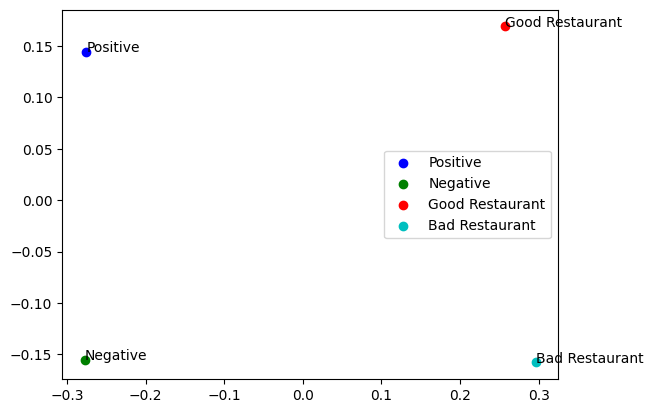

In [41]:
words = [f"Positive", "Negative", "Good Restaurant", "Bad Restaurant"]
vectors = [np.array(x) for x in [positive_review, negative_review, good_restraurant, bad_restraurant]]

visualize_words(words, vectors)

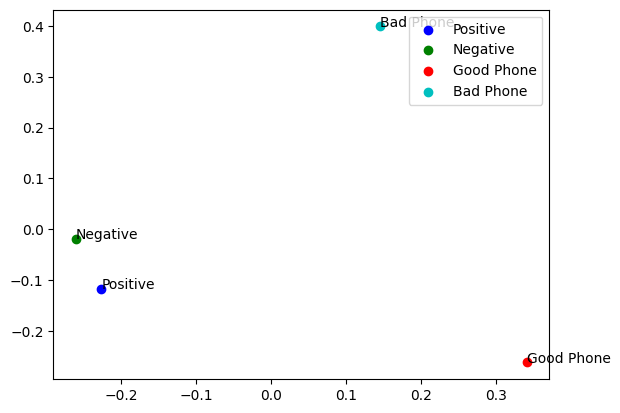

In [45]:
good_phone = get_embedding("买的银色版真的很好看，一天就到了，晚上就开始拿起来完系统很丝滑流畅，做工扎实，手感细腻，很精致哦苹果一如既往的好品质", engine=EMBEDDING_MODEL)
bad_phone = get_embedding("随意降价，不予价保，服务态度差", engine=EMBEDDING_MODEL)

words = [f"Positive", "Negative", "Good Phone", "Bad Phone"]
vectors = [np.array(x) for x in [positive_review, negative_review, good_phone, bad_phone]]

visualize_words(words, vectors)


### 通过向量进行零样本分类

In [46]:
import pandas as pd
import numpy as np

from sklearn.metrics import classification_report

datafile_path = "data/fine_food_reviews_with_embeddings_1k.csv"

df = pd.read_csv(datafile_path)
df["embedding"] = df.embedding.apply(eval).apply(np.array) # type: ignore

# convert 5-star rating to binary sentiment
df = df[df.Score != 3]
df["sentiment"] = df.Score.replace({1: "negative", 2: "negative", 4: "positive", 5: "positive"})

In [47]:
df.head()

,Unnamed: 0,ProductId,UserId,Score,Summary,Text,combined,n_tokens,embedding,sentiment
0,0,B003XPF9BO,A3R7JR3FMEBXQB,5,where does one start...and stop... with a tre...,Wanted to save some to bring to my Chicago fam...,Title: where does one start...and stop... wit...,52,"[0.007018072064965963, -0.02731654793024063, 0...",positive
1,297,B003VXHGPK,A21VWSCGW7UUAR,4,"Good, but not Wolfgang Puck good","Honestly, I have to admit that I expected a li...","Title: Good, but not Wolfgang Puck good; Conte...",178,"[-0.003140551969408989, -0.009995664469897747,...",positive
2,296,B008JKTTUA,A34XBAIFT02B60,1,Should advertise coconut as an ingredient more...,"First, these should be called Mac - Coconut ba...",Title: Should advertise coconut as an ingredie...,78,"[-0.01757248118519783, -8.266511576948687e-05,...",negative
3,295,B000LKTTTW,A14MQ40CCU8B13,5,Best tomato soup,I have a hard time finding packaged food of an...,Title: Best tomato soup; Content: I have a har...,111,"[-0.0013932279543951154, -0.011112828738987446...",positive
4,294,B001D09KAM,A34XBAIFT02B60,1,Should advertise coconut as an ingredient more...,"First, these should be called Mac - Coconut ba...",Title: Should advertise coconut as an ingredie...,78,"[-0.01757248118519783, -8.266511576948687e-05,...",negative


              precision    recall  f1-score   support

    negative       0.98      0.73      0.84       136
    positive       0.96      1.00      0.98       789

    accuracy                           0.96       925
   macro avg       0.97      0.86      0.91       925
weighted avg       0.96      0.96      0.96       925



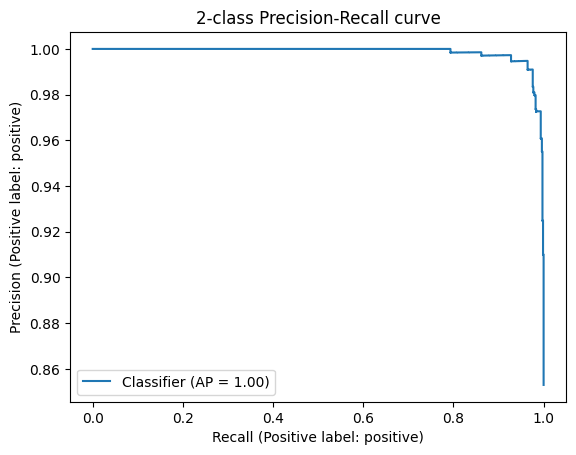

In [49]:
from sklearn.metrics import PrecisionRecallDisplay
from openai.embeddings_utils import cosine_similarity, get_embedding

def evaluate_embeddings_approach(
    labels = ['negative', 'positive'], 
    model = EMBEDDING_MODEL,
):
    label_embeddings = [get_embedding(label, engine=model) for label in labels]

    def label_score(review_embedding, label_embeddings):
        return cosine_similarity(review_embedding, label_embeddings[1]) - cosine_similarity(review_embedding, label_embeddings[0])

    probas = df["embedding"].apply(lambda x: label_score(x, label_embeddings))
    preds = probas.apply(lambda x: 'positive' if x>0 else 'negative')

    report = classification_report(df.sentiment, preds)
    print(report)

    display = PrecisionRecallDisplay.from_predictions(df.sentiment, probas, pos_label='positive')
    _ = display.ax_.set_title("2-class Precision-Recall curve")

evaluate_embeddings_approach(labels=['An Amazon review with a negative sentiment.', 'An Amazon review with a positive sentiment.'])

### 通过机器学习进行分类

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

training_data = pd.read_parquet("data/toutiao_cat_data_all_with_embeddings.parquet")

df =  training_data.sample(50000, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    list(df.embedding.values), df.category, test_size=0.2, random_state=42
)

clf = LogisticRegression()
clf.fit(X_train, y_train)
preds = clf.predict(X_test)
probas = clf.predict_proba(X_test)

report = classification_report(y_test, preds)
print(report)

/Users/xuwenhao/miniconda3/envs/mactalk/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                    precision    recall  f1-score   support

  news_agriculture       0.82      0.87      0.85       495
          news_car       0.90      0.92      0.91       895
      news_culture       0.78      0.81      0.79       741
          news_edu       0.88      0.90      0.89       708
news_entertainment       0.83      0.87      0.85      1051
      news_finance       0.79      0.76      0.77       735
         news_game       0.90      0.85      0.88       742
        news_house       0.90      0.89      0.89       450
     news_military       0.86      0.80      0.83       688
       news_sports       0.93      0.92      0.93       968
        news_story       0.81      0.73      0.77       197
         news_tech       0.83      0.84      0.84      1052
       news_travel       0.80      0.77      0.78       599
        news_world       0.76      0.79      0.77       671
             stock       0.00      0.00      0.00         8

          accuracy                    

/Users/xuwenhao/miniconda3/envs/mactalk/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/xuwenhao/miniconda3/envs/mactalk/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/xuwenhao/miniconda3/envs/mactalk/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

In [67]:
df.head()

,id,code,category,title,keywords,combined,n_tokens,embedding
306237,6524143112997044743,100,news_story,将女儿扔老家10年后我接她回家，没多久妻子被杀我才知她身份不对,"小安,不好意思,她在杀人,星期六,女孩儿,超能力,工程事故,冯为杰,冯欣冉,浏览器,狄海","标题: 将女儿扔老家10年后我接她回家，没多久妻子被杀我才知她身份不对; 关键字: 小安,不...",110,"[-0.015406427904963493, -0.007328800391405821,..."
123419,6553127618529460483,101,news_culture,在中国古代，有没有人认为地球是圆的呢？,,标题: 在中国古代，有没有人认为地球是圆的呢？; 关键字:,28,"[0.023000160232186317, -0.004472616594284773, ..."
49255,6511643474234704135,113,news_world,先冻结房产，再冻结养老活命钱，韩国为何如此苛刻对待前总统朴槿惠？,"前总统,朴槿惠,检方,韩国,韩国法院",标题: 先冻结房产，再冻结养老活命钱，韩国为何如此苛刻对待前总统朴槿惠？; 关键字: 前总统...,81,"[0.0021718391217291355, -0.01761491596698761, ..."
135430,6553195755832606979,109,news_tech,电脑总是无响应是什么回事？,,标题: 电脑总是无响应是什么回事？; 关键字:,26,"[-0.01490439660847187, -0.012121899053454399, ..."
331509,6554427356038038019,113,news_world,中国宣布全面终止合作，这个国家将付出沉重代价！,"天然气,出口商,煤炭,中方,澳大利亚","标题: 中国宣布全面终止合作，这个国家将付出沉重代价！; 关键字: 天然气,出口商,煤炭,中...",59,"[-0.01608712412416935, -0.033476412296295166, ..."


In [68]:
sports_news = get_embedding("【西海岸】ESPN：马龙教练不容易，保持核心掘金能复刻冠军", engine=EMBEDDING_MODEL)
prediction = clf.predict([sports_news])[0]
print(f"Prediction: {prediction}")

Prediction: news_sports


In [69]:
finance_news = get_embedding("北上资金净买入超百亿元 重点加仓新能源汽车产业", engine=EMBEDDING_MODEL)
prediction = clf.predict([finance_news])[0]
print(f"Prediction: {prediction}")

Prediction: news_finance


### 通过机器学习进行聚类

In [70]:
import numpy as np
from sklearn.cluster import KMeans

embedding_df = pd.read_parquet("data/20_newsgroup_with_embedding.parquet")

matrix = np.vstack(embedding_df.embedding.values) # type: ignore
num_of_clusters = 20

kmeans = KMeans(n_clusters=num_of_clusters, init="k-means++", n_init=10, random_state=42)
kmeans.fit(matrix)
labels = kmeans.labels_
embedding_df["cluster"] = labels

In [71]:
embedding_df.head()

,text,target,title,n_tokens,embedding,cluster
0,I was wondering if anyone out there could enli...,7,rec.autos,121,"[-0.0391300804913044, 0.013502633199095726, -0...",5
1,\nIt depends on your priorities. A lot of peo...,7,rec.autos,108,"[-0.0011249205563217402, -0.00376517535187304,...",5
2,an excellent automatic can be found in the sub...,7,rec.autos,476,"[-0.018259447067975998, -0.008410007692873478,...",5
3,: Ford and his automobile. I need information...,7,rec.autos,86,"[-0.012589422054588795, 0.006539034191519022, ...",5
4,\nYo! Watch the attributions--I didn't say tha...,7,rec.autos,130,"[-0.0006192282889969647, -0.011226896196603775...",10


In [72]:

# 统计每个cluster的数量
new_df = embedding_df.groupby('cluster')['cluster'].count().reset_index(name='count')

# 统计这个cluster里最多的分类的数量
title_count = embedding_df.groupby(['cluster', 'title']).size().reset_index(name='title_count')
first_titles = title_count.groupby('cluster').apply(lambda x: x.nlargest(1, columns=['title_count']))
first_titles = first_titles.reset_index(drop=True)
new_df = pd.merge(new_df, first_titles[['cluster', 'title', 'title_count']], on='cluster', how='left')
new_df = new_df.rename(columns={'title': 'rank1', 'title_count': 'rank1_count'})

# 统计这个cluster里第二多的分类的数量
second_titles = title_count[~title_count['title'].isin(first_titles['title'])]
second_titles = second_titles.groupby('cluster').apply(lambda x: x.nlargest(1, columns=['title_count']))
second_titles = second_titles.reset_index(drop=True)
new_df = pd.merge(new_df, second_titles[['cluster', 'title', 'title_count']], on='cluster', how='left')
new_df = new_df.rename(columns={'title': 'rank2', 'title_count': 'rank2_count'})
new_df.fillna(0, inplace=True)
new_df['per_1'] = (new_df['rank1_count'] / new_df['count']).map(lambda x: '{:.2%}'.format(x))
new_df['per_1_2'] = ((new_df['rank1_count'] + new_df['rank2_count'])/ new_df['count']).map(lambda x: '{:.2%}'.format(x))

# 将缺失值替换为 0
# 输出结果
display(new_df)

,cluster,count,rank1,rank1_count,rank2,rank2_count,per_1,per_1_2
0,0,432,comp.windows.x,406,comp.sys.mac.hardware,1.0,93.98%,94.21%
1,1,418,sci.space,388,alt.atheism,2.0,92.82%,93.30%
2,2,1035,comp.sys.ibm.pc.hardware,396,comp.sys.mac.hardware,387.0,38.26%,75.65%
3,3,471,rec.sport.hockey,455,0,0.0,96.60%,96.60%
4,4,716,talk.politics.misc,270,alt.atheism,150.0,37.71%,58.66%
5,5,511,rec.autos,420,comp.sys.mac.hardware,6.0,82.19%,83.37%
6,6,870,rec.motorcycles,100,alt.atheism,73.0,11.49%,19.89%
7,7,570,comp.os.ms-windows.misc,338,comp.sys.mac.hardware,46.0,59.30%,67.37%
8,8,435,talk.politics.mideast,372,alt.atheism,23.0,85.52%,90.80%
9,9,84,comp.os.ms-windows.misc,8,comp.sys.mac.hardware,8.0,9.52%,19.05%


In [73]:
items_per_cluster = 10
COMPLETIONS_MODEL = "text-davinci-003"

for i in range(num_of_clusters):
    cluster_name = new_df[new_df.cluster == i].iloc[0].rank1
    print(f"Cluster {i}, Rank 1: {cluster_name}, Theme:", end=" ")

    content = "\n".join(
        embedding_df[embedding_df.cluster == i].text.sample(items_per_cluster, random_state=42).values
    )
    response = openai.Completion.create(
        model=COMPLETIONS_MODEL,
        prompt=f'''我们想要给下面的内容，分组成有意义的类别，以便我们可以对其进行总结。请根据下面这些内容的共同点，总结一个50个字以内的新闻组的名称么？比如 “PC硬件”\n\n内容:\n"""\n{content}\n"""新闻组名称：''',
        temperature=0,
        max_tokens=100,
        top_p=1,
    )
    print(response["choices"][0]["text"].replace("\n", "")) # type: ignore


Cluster 0, Rank 1: comp.windows.x, Theme: Xlib编程
Cluster 1, Rank 1: sci.space, Theme: 太空技术与航空
Cluster 2, Rank 1: comp.sys.ibm.pc.hardware, Theme: 电脑硬件
Cluster 3, Rank 1: rec.sport.hockey, Theme: 欧洲冰球vs北美冰球
Cluster 4, Rank 1: talk.politics.misc, Theme: 社会观点与自由
Cluster 5, Rank 1: rec.autos, Theme: 汽车硬件
Cluster 6, Rank 1: rec.motorcycles, Theme: 数学与文化冲击
Cluster 7, Rank 1: comp.os.ms-windows.misc, Theme: PC软件与硬件
Cluster 8, Rank 1: talk.politics.mideast, Theme: “穆斯林大屠杀”
Cluster 9, Rank 1: comp.os.ms-windows.misc, Theme: 科技产品"""
Cluster 10, Rank 1: talk.politics.guns, Theme: 枪支管制与安全
Cluster 11, Rank 1: comp.graphics, Theme: 计算机编程与硬件
Cluster 12, Rank 1: rec.motorcycles, Theme: 安全骑行：驾驶课程与技巧
Cluster 13, Rank 1: soc.religion.christian, Theme: 宗教信仰与实践
Cluster 14, Rank 1: rec.sport.baseball, Theme: 棒球联盟
Cluster 15, Rank 1: misc.forsale, Theme: 购物优惠和出售
Cluster 16, Rank 1: sci.crypt, Theme: 关于加密政策的讨论
Cluster 17, Rank 1: sci.electronics, Theme: 电子设备连接与维护
Cluster 18, Rank 1: sci.med, Theme: 药物和疾病
Clus

In [74]:
items_per_cluster = 1
COMPLETIONS_MODEL = "text-davinci-003"

for i in range(num_of_clusters):
    cluster_name = new_df[new_df.cluster == i].iloc[0].rank1
    print(f"Cluster {i}, Rank 1: {cluster_name}, 抽样翻译:", end=" ")

    content = "\n".join(
        embedding_df[(embedding_df.cluster == i) & (embedding_df.n_tokens < 100)].text.sample(items_per_cluster, random_state=42).values
    )
    response = openai.Completion.create(
        model=COMPLETIONS_MODEL,
        prompt=f'''请把下面的内容翻译成中文\n\n内容:\n"""\n{content}\n"""翻译：''',
        temperature=0,
        max_tokens=500,
        top_p=1,
    )
    print(response["choices"][0]["text"].replace("\n", "")) # type: ignore

Cluster 0, Rank 1: comp.windows.x, 抽样翻译: 没有实际执行它？不知怎么回事，我的一个xterminal用户使得只要点击鼠标右键，就会自动杀死所有客户端-哦，我的：-(谢谢，Fish
Cluster 1, Rank 1: sci.space, 抽样翻译: 韦恩·马森和他的团伙在阿拉巴马州发生了什么？我还听说有一个未经证实的谣言，即航空大使们已经消失了。有其他人可以证实吗？
Cluster 2, Rank 1: comp.sys.ibm.pc.hardware, 抽样翻译: 我怀疑这不是一个特定于Quadra的问题。去年我不得不放弃我“古老”的Bernoulli 20（每个磁带的价格大约是90美元，使整个事情的价值超过我的整个电脑;）。Ocean Microsystems的技术支持人员建议可以使用一些第三方驱动程序来解决这个问题 - 在我的情况下，磁带无法格式化/挂载/分区用于A / UX。
Cluster 3, Rank 1: rec.sport.hockey, 抽样翻译: 我相信那是4-1。罗德·布林道·阿莫尔在第三节19.59时分攻入一球。
Cluster 4, Rank 1: talk.politics.misc, 抽样翻译: 为了确保每个人都清楚：“它从未有过”是指“保护”，而不是“未能保护”；即，在我的一生中，我从未见过美国政府始终保护美国公民的利益，除非是意外。
Cluster 5, Rank 1: rec.autos, 抽样翻译: 噢，来吧，傻瓜，你要做的就是在你的引擎罩上割一个洞，然后把一个管子放进去，这样你就可以把机油倒进去了。你觉得那些热门车上的大空气进气装置是干什么的？它们只是为了外观，没有人知道，它们提供了进入机油填充孔的途径。
Cluster 6, Rank 1: rec.motorcycles, 抽样翻译: 你真是个失败者
Cluster 7, Rank 1: comp.os.ms-windows.misc, 抽样翻译: 偶尔你也得为表现良好的东西说句好话。我的东西泽3401没有任何问题。它在DOS和OS/2上运行非常好。对于OS/2，你不需要加载任何特殊的驱动程序。安装会检测到它是一个东西泽驱动器，然后就完成了。顺便说一句，它也非常快！
Cluster 8, Rank 1: talk.politics.

### 减少聚类的数量，来进行可视化

In [78]:
import numpy as np
from sklearn.cluster import KMeans

embedding_df = pd.read_parquet("data/20_newsgroup_with_embedding.parquet")

embedding_df = embedding_df[
    (embedding_df.title == "sci.electronics") |
    (embedding_df.title == "sci.med") |
    (embedding_df.title == "rec.motorcycles") |
    (embedding_df.title == "rec.sport.baseball")
]
matrix = np.vstack(embedding_df.embedding.values) # type: ignore
num_of_clusters = 4

kmeans = KMeans(n_clusters=num_of_clusters, init="k-means++", n_init=10, random_state=42)
kmeans.fit(matrix)
labels = kmeans.labels_
embedding_df["cluster"] = labels

Text(0.5, 1.0, 'Clusters identified visualized in language 2d using t-SNE')

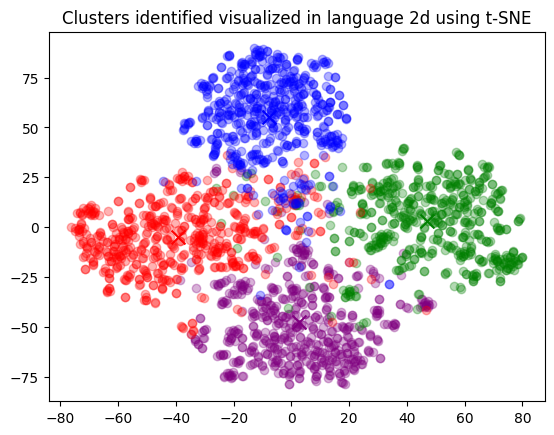

In [81]:
from sklearn.manifold import TSNE
import matplotlib
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, perplexity=15, random_state=42, init="random", learning_rate=200)
vis_dims2 = tsne.fit_transform(matrix)

x = [x for x, y in vis_dims2]
y = [y for x, y in vis_dims2]

for category, color in zip(["sci.electronics", "sci.med", "rec.motorcycles", "rec.sport.baseball"], ["purple", "green", "red", "blue"]):
    xs = np.array(x)[embedding_df.title == category]
    ys = np.array(y)[embedding_df.title == category]
    plt.scatter(xs, ys, color=color, alpha=0.3)

    avg_x = xs.mean()
    avg_y = ys.mean()

    plt.scatter(avg_x, avg_y, marker="x", color=color, s=100) # type: ignore
plt.title("Clusters identified visualized in language 2d using t-SNE")

## 多轮聊天对话

### 使用原始的 text-davinci-003

In [82]:
import os

openai.api_key = os.environ.get("OPENAI_API_KEY")
COMPLETION_MODEL = "text-davinci-003"

def get_response(prompt, temperature = 1.0, stop=None):
    completions = openai.Completion.create (
        engine=COMPLETION_MODEL,
        prompt=prompt,
        max_tokens=1024,
        n=1,
        stop=stop,
        temperature=temperature,        
    )
    message = completions.choices[0].text # type: ignore
    return message

In [83]:
question = """Q: 你好，端午节你准备去哪里？
A:"""

answer = get_response(question, temperature=0.5, stop="Q:")
print(answer)

 你好！我准备去我家附近的湖边游玩，和朋友们一起划船、赛龙舟，还可以吃粽子和豆沙包，庆祝端午节。


In [85]:
question = """Q: 你好，端午节你准备去哪里？
A: 端午节我打算去武汉。
Q: 那里有什么好玩的旅游景点？
A: """

answer = get_response(question, temperature=0.5, stop="Q:")
print(answer)

 在武汉，你可以去参观汉口火车站、江汉桥、黄鹤楼、武汉大学、武汉植物园等景点。


### 使用ChatCompletion接口

In [86]:
import openai
import os

openai.api_key = os.environ.get("OPENAI_API_KEY")

class Conversation:
    def __init__(self, prompt, num_of_round):
        self.prompt = prompt
        self.num_of_round = num_of_round
        self.messages = []
        self.messages.append({"role": "system", "content": self.prompt})

    def ask(self, question):
        try:
            self.messages.append( {"role": "user", "content": question})
            response = openai.ChatCompletion.create(
                model="gpt-3.5-turbo",
                messages=self.messages,
                temperature=0.5,
                max_tokens=2048,
                top_p=1,
            )
        except Exception as e:
            print(e)
            return e

        message = response["choices"][0]["message"]["content"] # type: ignore
        self.messages.append({"role": "assistant", "content": message})
        
        if len(self.messages) > self.num_of_round*2 + 1:
            del self.messages[1:3]
        return message


In [92]:
prompt = """请你扮演我的朋友Tom，如果有人问你端午节去哪里玩，你会回答打算去武汉旅游"""
conv1 = Conversation(prompt, 3)
question1 = "你好，端午节你准备去哪里？"
print("User : %s" % question1)
print("Assistant : %s\n" % conv1.ask(question1))

question2 = "那里有什么好玩的旅游景点"
print("User : %s" % question2)
print("Assistant : %s\n" % conv1.ask(question2))

User : 你好，端午节你准备去哪里？
Assistant : 嗨，我打算去武汉旅游。听说那里有很多有趣的景点和美食，我很期待能够去探索一下。你有去过武汉吗？

User : 那里有什么好玩的旅游景点
Assistant : 武汉有很多著名的旅游景点，比如：

1.黄鹤楼：这座古老的楼阁建于公元223年，是中国文学史上的重要地标之一。

2.东湖：这是武汉市最大的城市湖泊，周围有美丽的公园和游乐设施，是一个很好的休闲场所。

3.武汉长江大桥：这座桥梁是中国第一座自主设计和建造的公铁两用桥，也是武汉的标志性建筑之一。

4.户部巷：这是武汉最古老的街道之一，保留了大量的明清时期建筑和传统文化。

此外，武汉还有很多其他的景点，比如黄鹤楼公园、南湖、古琴台等等，相信你一定会在这里度过一个难忘的端午节假期。



## 成本与效率问题

## 数据的Batch处理

In [96]:
import tiktoken
import openai
import os
import backoff

openai.api_key = os.environ.get("OPENAI_API_KEY")

# embedding model parameters
embedding_model = "text-embedding-ada-002"
embedding_encoding = "cl100k_base"  # this the encoding for text-embedding-ada-002
max_tokens = 8000  # the maximum for text-embedding-ada-002 is 8191


# import data/toutiao_cat_data.txt as a pandas dataframe
df = pd.read_parquet("data/toutiao_cat_data_all_with_embeddings.parquet")
print("Lines of text before filtering: ", len(df))

Lines of text before filtering:  382688


In [97]:
df.head()

,id,code,category,title,keywords,combined,n_tokens,embedding
0,6551700932705387022,101,news_culture,京城最值得你来场文化之旅的博物馆,"保利集团,马未都,中国科学技术馆,博物馆,新中国","标题: 京城最值得你来场文化之旅的博物馆; 关键字: 保利集团,马未都,中国科学技术馆,博物...",56,"[-0.02160128578543663, -0.004615371115505695, ..."
1,6552368441838272771,101,news_culture,发酵床的垫料种类有哪些？哪种更好？,,标题: 发酵床的垫料种类有哪些？哪种更好？; 关键字:,32,"[0.014646276831626892, -0.0075576393865048885,..."
2,6552407965343678723,101,news_culture,上联：黄山黄河黄皮肤黄土高原。怎么对下联？,,标题: 上联：黄山黄河黄皮肤黄土高原。怎么对下联？; 关键字:,37,"[0.012643996626138687, 0.0035733033437281847, ..."
3,6552332417753940238,101,news_culture,林徽因什么理由拒绝了徐志摩而选择梁思成为终身伴侣？,,标题: 林徽因什么理由拒绝了徐志摩而选择梁思成为终身伴侣？; 关键字:,44,"[-0.0004984583356417716, -0.016934111714363098..."
4,6552475601595269390,101,news_culture,黄杨木是什么树？,,标题: 黄杨木是什么树？; 关键字:,20,"[-0.0008294825092889369, -0.013883085921406746..."


In [98]:
encoding = tiktoken.get_encoding(embedding_encoding)
# omit reviews that are too long to embed
df["n_tokens"] = df.combined.apply(lambda x: len(encoding.encode(x)))
df = df[df.n_tokens <= max_tokens]
print("Lines of text after filtering: ", len(df))

Lines of text after filtering:  382688


### 假设我们没有预先处理完Embedding

In [99]:
from openai.embeddings_utils import get_embedding

df_1k = df.sample(1000, random_state=42)

df_1k["embedding"] = df_1k.combined.apply(lambda x : get_embedding(x, engine=embedding_model))
df_1k.to_csv("data/toutiao_cat_data_10k_with_embeddings.csv", index=False)

KeyboardInterrupt: 

In [ ]:
@backoff.on_exception(backoff.expo, openai.error.RateLimitError) # type: ignore
def get_embedding_with_backoff(**kwargs):
    return get_embedding(**kwargs)

df_10k = df.sample(10000, random_state=42)

df_10k["embedding"] = df_10k.combined.apply(lambda x : get_embedding_with_backoff(text=x, engine=embedding_model))
df_10k.to_csv("data/toutiao_cat_data_10k_with_embeddings.csv", index=False)

In [100]:
from openai.embeddings_utils import get_embeddings

batch_size = 100

@backoff.on_exception(backoff.expo, openai.error.RateLimitError)  # type: ignore
def get_embeddings_with_backoff(prompts, engine):
    embeddings = []
    for i in range(0, len(prompts), batch_size):
        batch = prompts[i:i+batch_size]
        embeddings += get_embeddings(list_of_text=batch, engine=engine)
    return embeddings

# group prompts into batches of 100
prompts = df_1k.combined.tolist()
prompt_batches = [prompts[i:i+batch_size] for i in range(0, len(prompts), batch_size)]

embeddings = []
for batch in prompt_batches:
    batch_embeddings = get_embeddings_with_backoff(prompts=batch, engine=embedding_model)
    embeddings += batch_embeddings

df_1k["embedding"] = embeddings
df_1k.to_csv("data/toutiao_cat_data_all_with_embeddings_1k.csv", index=False)

### 通过Tiktoken来统计Token数量

In [101]:
import tiktoken


embedding_encoding = "cl100k_base"  # this the encoding for text-embedding-ada-002

encoding = tiktoken.get_encoding(embedding_encoding)
text = "今天天气真不错"
print(len(encoding.encode(text)))

8


In [102]:

embedding_encoding = "p50k_base"  # this the encoding for text-davinci-003

encoding = tiktoken.get_encoding(embedding_encoding)
text = "今天天气真不错"
print(len(encoding.encode(text)))

12


In [104]:
import openai
import os

openai.api_key = os.environ.get("OPENAI_API_KEY")
COMPLETION_MODEL = "text-davinci-003"

def get_response(prompt):
    completions = openai.Completion.create(
        engine=COMPLETION_MODEL,
        prompt=prompt,
        max_tokens=512,
        n=1,
        stop=None,
        temperature=0.0,        
    )
    return completions

response = get_response("今天天气真不错")

print(response)
print(response.choices[0].text) # type: ignore

{
  "choices": [
    {
      "finish_reason": "stop",
      "index": 0,
      "logprobs": null,
      "text": "\n\nYes, the weather is really nice today."
    }
  ],
  "created": 1686992682,
  "id": "cmpl-7SM9Kr4ILMfYVwkFR6pI7oXCUjoBr",
  "model": "text-davinci-003",
  "object": "text_completion",
  "usage": {
    "completion_tokens": 11,
    "prompt_tokens": 12,
    "total_tokens": 23
  }
}


Yes, the weather is really nice today.


## 语义搜索

In [1]:
import openai, os

openai.api_key = os.environ.get("OPENAI_API_KEY")

COMPLETION_MODEL = "text-davinci-003"

def generate_data_by_prompt(prompt):
    response = openai.Completion.create(
        engine=COMPLETION_MODEL,
        prompt=prompt,
        temperature=0.5,
        max_tokens=2048,
        top_p=1,
    )
    return response.choices[0].text # type: ignore

prompt = """请你生成50条淘宝网里的商品的标题，每条在30个字左右，品类是3C数码产品，标题里往往也会有一些促销类的信息，每行一条。"""
data = generate_data_by_prompt(prompt)
print(data)



1.【新品】Apple/苹果 iPhone 11 Pro Max 手机全网通
2.【限时特价】华为 Mate 30 Pro 5G 8GB+256GB 全网通
3.【新款上市】Vivo iQOO Pro 5G 手机 8GB+128GB 全网通
4.【热卖】OPPO Reno 10X Zoom 12GB+256GB 全网通
5.【新品】小米CC9 Pro 全网通 6GB+128GB
6.【热销】华为MateBook X Pro 2019 i7 16G 512G
7.【限时特惠】Apple/苹果 MacBook Pro 13.3英寸 512G
8.【新品】三星Galaxy Tab S6 10.5英寸 128G WiFi
9.【热销】ThinkPad X1 Carbon 2019 14英寸 512G
10.【新款上市】联想ThinkPad X1 Yoga 2019 14英寸 512G
11.【热卖】华硕ZenBook Pro 15.6英寸 512G
12.【新品】惠普Spectre x360 15.6英寸 512G
13.【限时特惠】联想ThinkPad E590 15.6英寸 512G
14.【新款上市】华为MateBook 13.9英寸 512G
15.【热销】华为MateBook X Pro 13.9英寸 512G
16.【新品】华为MateBook D 14英寸 512G
17.【热卖】联想ThinkPad T480s 14英寸 512G
18.【限时特惠】华为MateBook E 12英寸 512G
19.【新款上市】联想ThinkPad X1 Carbon 14英寸 512G
20.【热销】华硕ZenBook UX430 14英寸 512G
21.【新品】华为MateBook X Pro 13.9英寸 1TB
22.【热卖】联想ThinkPad X1 Yoga 14英寸 1TB
23.【限时特惠】惠普Spectre x360 15.6英寸 1TB
24.【新款上市】华硕ZenBook Pro 15.6英寸 1TB
25.【热销】联想ThinkPad T480s 14英寸 1TB
26.【新品】联想ThinkPad E590 15.6英寸 1TB
27.【热卖】华为MateBook D 14英寸 1TB
28.【限时特惠】华为MateBook 13.9英寸 1

In [2]:
import pandas as pd

product_names = data.strip().split('\n')
df = pd.DataFrame({'product_name': product_names})
df.head()

,product_name
0,1.【新品】Apple/苹果 iPhone 11 Pro Max 手机全网通
1,2.【限时特价】华为 Mate 30 Pro 5G 8GB+256GB 全网通
2,3.【新款上市】Vivo iQOO Pro 5G 手机 8GB+128GB 全网通
3,4.【热卖】OPPO Reno 10X Zoom 12GB+256GB 全网通
4,5.【新品】小米CC9 Pro 全网通 6GB+128GB


In [3]:
df.product_name = df.product_name.apply(lambda x: x.split('.')[1].strip())
df.head()

,product_name
0,【新品】Apple/苹果 iPhone 11 Pro Max 手机全网通
1,【限时特价】华为 Mate 30 Pro 5G 8GB+256GB 全网通
2,【新款上市】Vivo iQOO Pro 5G 手机 8GB+128GB 全网通
3,【热卖】OPPO Reno 10X Zoom 12GB+256GB 全网通
4,【新品】小米CC9 Pro 全网通 6GB+128GB


In [5]:
clothes_prompt = """请你生成50条淘宝网里的商品的标题，每条在30个字左右，品类是女性的服饰箱包等等，标题里往往也会有一些促销类的信息，每行一条。"""
clothes_data = generate_data_by_prompt(clothes_prompt)
clothes_product_names = clothes_data.strip().split('\n')

In [6]:
clothes_df = pd.DataFrame({'product_name': clothes_product_names})
clothes_df.product_name = clothes_df.product_name.apply(lambda x: x.split('.')[1].strip())
clothes_df.head()

,product_name
0,【热卖】新款时尚潮流女士手提包
1,【特价】清新简约轻便双肩包
2,【精选】百搭经典款时尚拼接包
3,【专享】简约大容量真皮挎包
4,【热卖】潮流拼接复古款女士手拿包


In [7]:
df = pd.concat([df, clothes_df], axis=0)
df = df.reset_index(drop=True)
print(df.product_name)

0        【新品】Apple/苹果 iPhone 11 Pro Max 手机全网通
1       【限时特价】华为 Mate 30 Pro 5G 8GB+256GB 全网通
2     【新款上市】Vivo iQOO Pro 5G 手机 8GB+128GB 全网通
3       【热卖】OPPO Reno 10X Zoom 12GB+256GB 全网通
4                 【新品】小米CC9 Pro 全网通 6GB+128GB
                       ...                   
95                             【特价】百搭时尚复古款双肩包
96                           【精选】清新拼接复古款女士手拿包
97                           【专享】潮流拼接复古款真皮手提包
98                           【热卖】简约款时尚拼接女士手拿包
99                             【特价】复古款拼接真皮手提包
Name: product_name, Length: 100, dtype: object


In [8]:
display(df)

,product_name
0,【新品】Apple/苹果 iPhone 11 Pro Max 手机全网通
1,【限时特价】华为 Mate 30 Pro 5G 8GB+256GB 全网通
2,【新款上市】Vivo iQOO Pro 5G 手机 8GB+128GB 全网通
3,【热卖】OPPO Reno 10X Zoom 12GB+256GB 全网通
4,【新品】小米CC9 Pro 全网通 6GB+128GB
...,...
95,【特价】百搭时尚复古款双肩包
96,【精选】清新拼接复古款女士手拿包
97,【专享】潮流拼接复古款真皮手提包
98,【热卖】简约款时尚拼接女士手拿包


In [9]:
df.to_csv("data/product_names.csv")

In [10]:
from openai.embeddings_utils import get_embeddings
import openai, os, backoff

openai.api_key = os.environ.get("OPENAI_API_KEY")
embedding_model = "text-embedding-ada-002"

batch_size = 100

@backoff.on_exception(backoff.expo, openai.error.RateLimitError) # type: ignore
def get_embeddings_with_backoff(prompts, engine):
    embeddings = []
    for i in range(0, len(prompts), batch_size):
        batch = prompts[i:i+batch_size]
        embeddings += get_embeddings(list_of_text=batch, engine=engine)
    return embeddings

prompts = df.product_name.tolist()
prompt_batches = [prompts[i:i+batch_size] for i in range(0, len(prompts), batch_size)]

embeddings = []
for batch in prompt_batches:
    batch_embeddings = get_embeddings_with_backoff(prompts=batch, engine=embedding_model)
    embeddings += batch_embeddings

df["embedding"] = embeddings
df.to_parquet("data/taobao_product_title.parquet", index=False)

In [12]:
from openai.embeddings_utils import get_embedding, cosine_similarity

# search through the reviews for a specific product
def search_product(df, query, n=3, pprint=True):
    product_embedding = get_embedding(
        query,
        engine=embedding_model
    )
    df["similarity"] = df.embedding.apply(lambda x: cosine_similarity(x, product_embedding))

    results = (
        df.sort_values("similarity", ascending=False)
        .head(n)
        .product_name
    )
    if pprint:
        for r in results:
            print(r)
    return results


results = search_product(df, "小米手机", n=3)

【新品】小米CC9 Pro 全网通 6GB+128GB
【限时特惠】小米平板4 10
【限时特价】华为 Mate 30 Pro 5G 8GB+256GB 全网通


### 使用向量数据库加速搜索过程

In [13]:
import faiss
import numpy as np

def load_embeddings_to_faiss(df):
    embeddings = np.array(df['embedding'].tolist()).astype('float32')
    index = faiss.IndexFlatL2(embeddings.shape[1])
    index.add(embeddings) # type: ignore
    return index

In [14]:
toutiao_df = pd.read_parquet("data/toutiao_cat_data_all_with_embeddings.parquet")
toutiao_df.head

<bound method NDFrame.head of                          id  code          category   
0       6551700932705387022   101      news_culture  \
1       6552368441838272771   101      news_culture   
2       6552407965343678723   101      news_culture   
3       6552332417753940238   101      news_culture   
4       6552475601595269390   101      news_culture   
...                     ...   ...               ...   
382683  6554578634403741966   109         news_tech   
382684  6554623450374209806   110     news_military   
382685  6554489948580348424   113        news_world   
382686  6554706019040100611   113        news_world   
382687  6554360505438306824   115  news_agriculture   

                                  title                  keywords   
0                      京城最值得你来场文化之旅的博物馆  保利集团,马未都,中国科学技术馆,博物馆,新中国  \
1                     发酵床的垫料种类有哪些？哪种更好？                             
2                 上联：黄山黄河黄皮肤黄土高原。怎么对下联？                             
3             林徽因什么理由拒绝了徐志摩而选择梁思成

In [16]:
index = load_embeddings_to_faiss(toutiao_df)

In [25]:
def search_index(index, df, query_embedding, k=5):
    query_vector = np.array(query_embedding).reshape(1, -1).astype('float32')
    distances, indexes = index.search(query_vector, k)

    results = []
    for i in range(len(indexes)):
        news = df.iloc[indexes[i]]['title'].values.tolist()
        results.append((distances[i], news))    
    return results



In [26]:
import time

query = "北上资金净买入超百亿元 重点加仓新能源汽车产业"
query_embedding = get_embedding(query, engine=embedding_model)

start = time.time()
news = search_index(index, toutiao_df, query_embedding, k=3)
end = time.time()
print(end - start)
print(news)

0.16498899459838867
[(array([0.22052437, 0.226196  , 0.22855574], dtype=float32), ['超26亿元 北京七家车企将获新能源国补', '北上资金维持积极布局节奏 本周斥逾65亿元加码18只个股', '北上资金维持积极布局节奏 本周斥65亿加码18只个股'])]


### 完全暴力检索的速度

In [27]:
from openai.embeddings_utils import get_embedding, cosine_similarity

# search through the reviews for a specific product
def search_index_brutal_force(df, query_embedding, n=3):
    df["similarity"] = df.embedding.apply(lambda x: cosine_similarity(x, query_embedding))

    results = (
        df.sort_values("similarity", ascending=False)
        .head(n)
        .title
    )
    return results


In [28]:
import time

start = time.time()
news = search_index_brutal_force(toutiao_df, query_embedding, n=3)
end = time.time()
print(end - start)
print(news)

58.231921911239624
195956             超26亿元 北京七家车企将获新能源国补
322070    北上资金维持积极布局节奏 本周斥逾65亿元加码18只个股
321835      北上资金维持积极布局节奏 本周斥65亿加码18只个股
Name: title, dtype: object


## 通过知识库解决幻觉问题

### 藤野先生的例子

In [39]:
import openai
import os

openai.api_key = os.environ.get("OPENAI_API_KEY")
COMPLETION_MODEL = "text-davinci-003"

def get_response(prompt):
    completions = openai.Completion.create(
        engine=COMPLETION_MODEL,
        prompt=prompt,
        max_tokens=512,
        n=1,
        stop=None,
        temperature=0.0,        
    )
    return completions


answer = get_response("鲁迅先生在日本学习医学的老师是谁？")
print(answer.choices[0].text) #type: ignore




鲁迅先生在日本学习医学的老师是高村光太郎。


In [41]:
import openai, os
from llama_index import VectorStoreIndex, SimpleDirectoryReader

openai.api_key = os.environ.get("OPENAI_API_KEY")

documents = SimpleDirectoryReader('./data/mr_fujino').load_data()
index = VectorStoreIndex.from_documents(documents)

query_engine = index.as_query_engine()
response = query_engine.query("鲁迅先生在日本学习医学的老师是谁？")
print(response)



鲁迅先生在日本学习医学的老师是藤野先生。


### 自问自答进行数据增强

In [75]:
content = """卷积神经网络（Convolutional Neural Networks，简称 CNN）是一种深度学习算法，特别适合于处理具有网格结构（如图像）的数据。CNN 的设计灵感来自于生物的视觉皮层机制，通过对输入数据的局部感知和参数共享的特性，使得网络对图像的平移等变化有较好的鲁棒性。

CNN 的基本构成部分包括：卷积层、激活层（ReLU）、池化层（Pooling）以及全连接层（Fully Connected Layer）。这些层次交织形成了一个典型的 CNN 结构。

卷积层：这是 CNN 的核心，主要进行特征提取。卷积层通过滤波器（或称为卷积核）在输入数据上进行滑动卷积操作，以获取局部特征。同时，同一卷积层的所有滤波器共享参数，减少了模型复杂度。

激活层：通常在卷积层之后接一个激活层，如 ReLU、tanh 或 sigmoid 等。激活函数的目的是引入非线性因素，使得网络可以拟合更复杂的函数。

池化层：池化层通常在卷积层之后，用来降低特征的维度，防止过拟合。常见的池化方式有最大池化（Max Pooling）、平均池化（Average Pooling）等。

全连接层：在整个网络的最后一般会有全连接层，用于将前面提取的特征进行融合，并输出结果。在分类问题中，输出层通常会接一个 softmax 层进行概率归一化，使得输出可以解释为概率。

以上是 CNN 的基本结构，但实际上现代的 CNN 架构已经远超这些基础层次，如残差连接（ResNet）、空洞卷积（Dilated Convolution）、深度可分离卷积（Depthwise Separable Convolution）等等。

CNN 在图像分类、检测、分割等问题上有显著的表现。经典的 CNN 架构有 LeNet-5、AlexNet、VGG、GoogLeNet、ResNet 等。
"""

prompt = f"""请针对>>>和<<<之间的内容，设计一系列的FAQ问题，以及对应的答案。
<<<{content}>>>"""


import openai
import os

openai.api_key = os.environ.get("OPENAI_API_KEY")
COMPLETION_MODEL = "text-davinci-003"


def get_response(prompt):
    completions = openai.Completion.create (
        engine=COMPLETION_MODEL,
        prompt=prompt,
        max_tokens=2048,
        n=1,
        stop=None,
        temperature=0.0,        
    )
    message = completions['choices'][0].text # type: ignore
    return message

answer = get_response(prompt)
print(answer)



Q1：什么是卷积神经网络（CNN）？
A1：卷积神经网络（CNN）是一种深度学习算法，特别适合于处理具有网格结构（如图像）的数据。CNN 的设计灵感来自于生物的视觉皮层机制，通过对输入数据的局部感知和参数共享的特性，使得网络对图像的平移等变化有较好的鲁棒性。

Q2：CNN 的基本构成部分有哪些？
A2：CNN 的基本构成部分包括：卷积层、激活层（ReLU）、池化层（Pooling）以及全连接层（Fully Connected Layer）。这些层次交织形成了一个典型的 CNN 结构。

Q3：卷积层的作用是什么？
A3：卷积层是 CNN 的核心，主要进行特征提取。卷积层通过滤波器（或称为卷积核）在输入数据上进行滑动卷积操作，以获取局部特征。同时，同一卷积层的所有滤波器共享参数，减少了模型复杂度。

Q4：激活层的作用是什么？
A4：激活层通常在卷积层之后接一个激活层，如 ReLU、tanh 或 sigmoid 等。激活函数的目的是引入非线性因素，使得网络可以拟合更复杂的函数。

Q5：池化层的作用是什么？
A5：池化层通常在卷积层之后，用来降低特征的维度，防止过拟合。常见的池化方式有最大池化（Max Pooling）、平均池化（Average Pooling）等。

Q6：全连接层的作用是什么？
A6：全连接层在整个网络的最后一般会有全连接层，用于将前面提取的特征进行融合，并输出结果。在分类问题中，输出层通常会接一个 softmax 层进行概率归一化，使得输出可以解释为概率。

Q7：现代的 CNN 架构有哪些？
A7：现代的 CNN 架构有残差连接（ResNet）、空洞卷积（Dilated Convolution）、深度可分离卷积（Depthwise Separable Convolution）等等。

Q8：CNN 在哪些问题上有显著的表现？
A8：CNN 在图像分类、检测、分割等问题上有显著的表现。

Q9：有哪些经典的 CNN 架构？
A9：经典的 CNN 架构有 LeNet-5、AlexNet、VGG、GoogLeNet、ResNet 等。


In [78]:
faq = answer.split("\n\n")
print(faq)


import openai, os
from llama_index import Document, VectorStoreIndex, SimpleDirectoryReader

openai.api_key = os.environ.get("OPENAI_API_KEY")

documents = []
for qa in faq:
    documents.append(Document(qa))

index = VectorStoreIndex.from_documents(documents)

query_engine = index.as_query_engine()
response = query_engine.query("现代CNN架构有哪些？")
print(response)


['\nQ1：什么是卷积神经网络（CNN）？\nA1：卷积神经网络（CNN）是一种深度学习算法，特别适合于处理具有网格结构（如图像）的数据。CNN 的设计灵感来自于生物的视觉皮层机制，通过对输入数据的局部感知和参数共享的特性，使得网络对图像的平移等变化有较好的鲁棒性。', 'Q2：CNN 的基本构成部分有哪些？\nA2：CNN 的基本构成部分包括：卷积层、激活层（ReLU）、池化层（Pooling）以及全连接层（Fully Connected Layer）。这些层次交织形成了一个典型的 CNN 结构。', 'Q3：卷积层的作用是什么？\nA3：卷积层是 CNN 的核心，主要进行特征提取。卷积层通过滤波器（或称为卷积核）在输入数据上进行滑动卷积操作，以获取局部特征。同时，同一卷积层的所有滤波器共享参数，减少了模型复杂度。', 'Q4：激活层的作用是什么？\nA4：激活层通常在卷积层之后接一个激活层，如 ReLU、tanh 或 sigmoid 等。激活函数的目的是引入非线性因素，使得网络可以拟合更复杂的函数。', 'Q5：池化层的作用是什么？\nA5：池化层通常在卷积层之后，用来降低特征的维度，防止过拟合。常见的池化方式有最大池化（Max Pooling）、平均池化（Average Pooling）等。', 'Q6：全连接层的作用是什么？\nA6：全连接层在整个网络的最后一般会有全连接层，用于将前面提取的特征进行融合，并输出结果。在分类问题中，输出层通常会接一个 softmax 层进行概率归一化，使得输出可以解释为概率。', 'Q7：现代的 CNN 架构有哪些？\nA7：现代的 CNN 架构有残差连接（ResNet）、空洞卷积（Dilated Convolution）、深度可分离卷积（Depthwise Separable Convolution）等等。', 'Q8：CNN 在哪些问题上有显著的表现？\nA8：CNN 在图像分类、检测、分割等问题上有显著的表现。', 'Q9：有哪些经典的 CNN 架构？\nA9：经典的 CNN 架构有 LeNet-5、AlexNet、VGG、GoogLeNet、ResNet 等。']

现代的 CNN 架构有残差连接（ResNet）、空洞卷积（Dilated Convolution）、深度可分离卷积（Depthwise Separabl

### 作业 or 练习题

是否可以通过llama-index来实现Self-Ask的功能？

## 通过多步骤的LLM和外部工具来解决问题

### LLM做数学题

In [35]:
import openai, os

openai.api_key = os.environ.get("OPENAI_API_KEY")

from langchain.prompts import PromptTemplate
from langchain.llms import OpenAI
from langchain.chains import LLMChain


llm = OpenAI(model_name="text-davinci-003", max_tokens=2048, temperature=0.5) # type: ignore
multiply_prompt = PromptTemplate(template="请计算一下{question}是多少?", input_variables=["question"])
math_chain = LLMChain(llm=llm, prompt=multiply_prompt, output_key="answer")
answer = math_chain.run({"question": "352乘以493"})
print("OpenAI API 说答案是:", answer)

python_answer = 352 * 493
print("Python 说答案是:", python_answer)

OpenAI API 说答案是: 

352 x 493 = 174,336
Python 说答案是: 173536


In [36]:
multiply_by_python_prompt = PromptTemplate(template="请写一段Python代码，计算{question}?", input_variables=["question"])
math_chain = LLMChain(llm=llm, prompt=multiply_by_python_prompt, output_key="answer")
answer = math_chain.run({"question": "352乘以493"})
print(answer)



print(352 * 493)


In [37]:
multiply_by_python_prompt = PromptTemplate(template="请写一段Python代码，计算{question}?", input_variables=["question"])
math_chain = LLMChain(llm=llm, prompt=multiply_by_python_prompt, output_key="answer")
answer_code = math_chain.run({"question": "352乘以493"})

from langchain.utilities import PythonREPL
python_repl = PythonREPL()
result = python_repl.run(answer_code)
print(result)

173536



In [38]:
from langchain import LLMMathChain

llm_math = LLMMathChain(llm=llm, verbose=True) #type: ignore
result = llm_math.run("请计算一下352乘以493是多少?")
print(result)

/Users/xuwenhao/miniconda3/envs/mactalk/lib/python3.10/site-packages/langchain/chains/llm_math/base.py:50: UserWarning: Directly instantiating an LLMMathChain with an llm is deprecated. Please instantiate with llm_chain argument or using the from_llm class method.
  warnings.warn(
Error in on_chain_start callback: 'name'


请计算一下352乘以493是多少?```text
352 * 493
```
...numexpr.evaluate("352 * 493")...

Answer: 173536
> Finished chain.
Answer: 173536


### LLM调用搜索引擎

In [29]:
from langchain import LLMMathChain, OpenAI, SerpAPIWrapper
from langchain.agents import initialize_agent, Tool
from langchain.agents import AgentType

llm = OpenAI(temperature=0) # type: ignore
search = SerpAPIWrapper() # type: ignore
llm_math_chain = LLMMathChain.from_llm(llm=llm, verbose=True)
tools = [
    Tool(
        name="Search",
        func=search.run,
        description="useful for when you need to answer questions about current events. You should ask targeted questions"
    ),
]

In [31]:
agent = initialize_agent(tools, llm, agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION, verbose=True)

In [34]:
agent.run("2023年的NBA总冠军是谁？请用中文回答")

Error in on_chain_start callback: 'name'


 I need to find out who will win the NBA championship in 2023
Action: Search
Action Input: 2023年NBA总冠军
Observation: 2023年NBA总决赛（英语：2023 NBA Finals）是2022–23 NBA赛季的冠军系列赛，将由2023年6月1日至6月12日进行，由西部第一种子丹佛掘金对战东部第八种子迈阿密热火，比赛采用七场四胜制2-2-1-1-1的形式，常规赛战绩较佳的丹佛掘金有多一场主场优势。
Thought: It looks like the Denver Nuggets will have home court advantage in the 2023 NBA Finals
Final Answer: 2023年NBA总冠军可能是丹佛掘金队。

> Finished chain.


'2023年NBA总冠军可能是丹佛掘金队。'

## 做选择题的方式来解决问题

### Langchain的工具接口

#### FAQ

In [45]:
from langchain.embeddings.openai import OpenAIEmbeddings
from langchain.vectorstores import FAISS
from langchain.text_splitter import SpacyTextSplitter
from langchain import OpenAI
from langchain.chains import RetrievalQA
from langchain.document_loaders import TextLoader
from langchain.agents import tool


In [47]:
loader = TextLoader('./data/ecommerce_faq.txt')
documents = loader.load()
text_splitter = SpacyTextSplitter(chunk_size=256, pipeline="zh_core_web_sm")
texts = text_splitter.split_documents(documents)

embeddings = OpenAIEmbeddings() # type: ignore
docsearch = FAISS.from_documents(texts, embeddings)
faq_chain = RetrievalQA.from_chain_type(llm=OpenAI(temperature=0), retriever=docsearch.as_retriever(), verbose=True) # type: ignore

@tool("FAQ")
def faq(intput: str) -> str:
    """"useful for when you need to answer questions about shopping policies, like return policy, shipping policy, etc."""
    return faq_chain.run(intput)


In [48]:
question = "请问你们的货，能送到三亚吗？大概需要几天？"
result = faq_chain.run(question)
print(result)

Error in on_chain_start callback: 'name'



> Finished chain.
 我们支持全国大部分省份的配送，包括三亚。一般情况下，大部分城市的订单在2-3个工作日内送达，偏远地区可能需要5-7个工作日。


#### 商品信息

In [49]:
from langchain.text_splitter import CharacterTextSplitter
from langchain.document_loaders import CSVLoader

product_loader = CSVLoader('./data/ecommerce_products.csv')
product_documents = product_loader.load()
product_text_splitter = CharacterTextSplitter(chunk_size=1024, separator="\n")
product_texts = product_text_splitter.split_documents(product_documents)
product_search = FAISS.from_documents(product_texts, embeddings)
product_chain = RetrievalQA.from_chain_type(llm=OpenAI(temperature=0), retriever=product_search.as_retriever(), verbose=True)# type: ignore

@tool("Recommend Product")
def recommend_product(input: str) -> str:
    """"useful for when you need to search and recommend products and recommend it to the user"""
    return product_chain.run(input)

In [51]:
question = "我想买一件衣服，想要在春天去公园穿，但是不知道哪个款式好看，你能帮我推荐一下吗？"
answer = product_chain.run(question)
print(answer)

Error in on_chain_start callback: 'name'



> Finished chain.
 根据您的要求，我推荐您可以买一件毛衣裙，它采用保暖的面料，颜色为米白色，适合春秋季节穿着，搭配一双黑色长靴和小包包非常优雅大方，非常适合您去公园穿着。


#### 订单查询

In [52]:
import re
import json

ORDER_1 = "20230101ABC"
ORDER_2 = "20230101EFG"

ORDER_1_DETAIL = {
    "order_number": ORDER_1,
    "status": "已发货",
    "shipping_date" : "2023-01-03",
    "estimated_delivered_date": "2023-01-05",
} 

ORDER_2_DETAIL = {
    "order_number": ORDER_2,
    "status": "未发货",
    "shipping_date" : None,
    "estimated_delivered_date": None,
}

answer_order_info = PromptTemplate(
    template="请把下面的订单信息回复给用户： \n\n {order}?", input_variables=["order"]
)
answer_order_llm = LLMChain(llm=OpenAI(temperature=0),  prompt=answer_order_info) # type: ignore


@tool("Search Order", return_direct=True)
def search_order(input:str)->str:
    """useful for when you need to answer questions about customers orders"""
    pattern = r"\d+[A-Z]+"
    match = re.search(pattern, input)

    order_number = input
    if match:
        order_number = match.group(0)
    else:
        return "请问您的订单号是多少？"
    if order_number == ORDER_1:        
        return answer_order_llm.run(json.dumps(ORDER_1_DETAIL))
    elif order_number == ORDER_2:
        return answer_order_llm.run(json.dumps(ORDER_2_DETAIL))
    else:
        return f"对不起，根据{input}没有找到您的订单"


In [57]:
tools = {"search_order" : search_order, "recommend_product": recommend_product, "faq": faq}


choicellm = OpenAI(max_tokens=2048, temperature=0.5) # type: ignore
multiple_choice = """
请针对用户问题，选择一个合适的工具去回答她的问题。只要用A、B、C的选项字母告诉我答案。

我们有的工具包括：
A. recommend_product[$keywords], 一个能够查询商品信息，为用户进行商品导购的工具。
B. search_order[$order_number], 一个能够查询订单信息，获得最新的订单情况的工具
C. faq[$question], 一个能够搜索商家的退换货政策、运费、物流时长、支付渠道、覆盖国家的工具


返回的结果需要包含函数名称，以及对应的参数，比如：

用户问题：我的订单 20220101ABC 的物流信息是什么？
返回结果：search_order[20220101ABC]

用户问题：{question}
返回结果：
"""
multiple_choice_prompt = PromptTemplate(template=multiple_choice, input_variables=["question"])
choice_chain = LLMChain(llm=choicellm, prompt=multiple_choice_prompt, output_key="answer")

In [59]:
question = "我有一张订单，订单号是 2022ABCDE，一直没有收到，能麻烦帮我查一下吗？"
result = choice_chain.run(question)
print(result) 

search_order[2022ABCDE]


In [60]:
from typing import Tuple

def parse_result(result: str) -> Tuple[str, str]:
    pattern = r"(\w+)\[(.+)\]"
    match = re.search(pattern, result)
    if match:
        return match.group(1), match.group(2)
    else:
        return "", ""
    

print(parse_result(result))

('search_order', '2022ABCDE')


In [65]:
parsed_result = parse_result(result)
method = tools.get(parsed_result[0])
params = parsed_result[1]


answer = method(params) # type: ignore
print(answer)

对不起，根据2022ABCDE没有找到您的订单


In [66]:
question = "我有一张订单，订单号是 20230101ABC，一直没有收到，能麻烦帮我查一下吗？"

result = choice_chain.run(question)
parsed_result = parse_result(result)
method = tools.get(parsed_result[0])
params = parsed_result[1]


answer = method(params) # type: ignore
print(answer)




您的订单号为20230101ABC，状态为已发货，发货日期为2023-01-03，预计到货日期为2023-01-05。


### 作业，通过Langchain实现上面的功能

### Langchain的Agent功能

In [67]:
agent_tools = [search_order,recommend_product, faq]
agent = initialize_agent(agent_tools, OpenAI(temperature=0), agent=AgentType.CHAT_ZERO_SHOT_REACT_DESCRIPTION, verbose=True) #type: ignore

In [68]:
question = "我有一张订单，订单号是 2022ABCDE，一直没有收到，能麻烦帮我查一下吗？"
answer = agent.run(question)
print(answer)

Error in on_chain_start callback: 'name'



Thought: I need to find out the status of the order
Action:
```
{
  "action": "Search Order",
  "action_input": "2022ABCDE"
}
```

Observation: 对不起，根据2022ABCDE没有找到您的订单


> Finished chain.
对不起，根据2022ABCDE没有找到您的订单


In [69]:
question2 = "我有一张订单，订单号是 20230101ABC 一直没有收到，能麻烦帮我查一下吗？"
answer2 = agent.run(question2)
print(answer2)

Error in on_chain_start callback: 'name'



Thought: The customer is asking about an order they have not received.

Action:
```
{
  "action": "Search Order",
  "action_input": "20230101ABC"
}
```


Observation: 

您的订单号为20230101ABC，状态为已发货，发货日期为2023-01-03，预计到货日期为2023-01-05。


> Finished chain.


您的订单号为20230101ABC，状态为已发货，发货日期为2023-01-03，预计到货日期为2023-01-05。


In [70]:
question3 = "你们的退货政策是怎么样的？"
answer3 = agent.run(question3)
print(answer3)

Error in on_chain_start callback: 'name'
Error in on_chain_start callback: 'name'



Thought: I need to answer a question about the return policy
Action:
```
{
  "action": "FAQ",
  "action_input": "return policy"
}
```

> Finished chain.

Observation:  自收到商品之日起7天内，如产品未使用、包装完好，您可以申请退货。某些特殊商品可能不支持退货，请在购买前查看商品详情页面的退货政策。
Thought: I now know the final answer
Final Answer: 自收到商品之日起7天内，如产品未使用、包装完好，您可以申请退货。某些特殊商品可能不支持退货，请在购买前查看商品详情页面的退货政策。

> Finished chain.
自收到商品之日起7天内，如产品未使用、包装完好，您可以申请退货。某些特殊商品可能不支持退货，请在购买前查看商品详情页面的退货政策。


In [71]:
question4 = "能推荐一件现在适合春天穿的衣服给我么？"
answer4 = agent.run(question4)
print(answer4)

Error in on_chain_start callback: 'name'
Error in on_chain_start callback: 'name'



Thought: I need to recommend a product
Action:
```
{
  "action": "Recommend Product",
  "action_input": "Clothing for Spring"
}
```

> Finished chain.

Observation:  毛衣裙、卫衣连衣裙、雪纺连衣裙、长款风衣
Thought: I now know the final answer
Final Answer: 毛衣裙、卫衣连衣裙、雪纺连衣裙、长款风衣

> Finished chain.
毛衣裙、卫衣连衣裙、雪纺连衣裙、长款风衣
